In [1]:
#Get the MNIST dataset from sklearn.datasets
from sklearn.datasets import fetch_mldata
import numpy as np
import pandas as pd
mnist = fetch_mldata('MNIST original')

In [2]:
#Break up the data into attributes and values
X, y = mnist["data"], mnist["target"]

In [3]:
def shift_up(X):
    #for number in X:
    #    number_image = row.reshape(28,28)
    shifted_image = X.reshape(28,28)    
    top = shifted_image[0,:]
    for i in range(0, len(shifted_image)-1):
        shifted_image[i,:] = shifted_image[i+1,:]  
    shifted_image[27,:] = top
    shifted_image = shifted_image.reshape(1,784)
    return shifted_image

def shift_down(X):
    #for number in X:
    #    number_image = row.reshape(28,28)
    shifted_image = X.reshape(28,28)    
    bottom = shifted_image[27,:]
    for i in range(len(shifted_image)-1, 0,-1):
        
        shifted_image[i,:] = shifted_image[i-1,:]  
    shifted_image[0,:] = bottom
    shifted_image = shifted_image.reshape(1,784)
    return shifted_image
    
def shift_left(X):
    #for number in X:
    #    number_image = row.reshape(28,28)
    shifted_image = X.reshape(28,28)    
    left = shifted_image[:,0]
    for i in range(0, len(shifted_image)-1):
        shifted_image[:,i] = shifted_image[:,i+1]  
    shifted_image[:,27] = left
    shifted_image = shifted_image.reshape(1,784)
    return shifted_image
    
def shift_right(X):
    #for number in X:
    #    number_image = row.reshape(28,28)
    shifted_image = X.reshape(28,28)    
    right = shifted_image[:,27]
    for i in range(len(shifted_image)-1, 0,-1):
        
        shifted_image[:,i] = shifted_image[:,i-1]  
    shifted_image[:,0] = right
    shifted_image = shifted_image.reshape(1,784)
    return shifted_image
    


    

In [ ]:
for i in range(0,len(X)):

    shifted_image_up = shift_up(X[i].copy())
    shifted_image_down = shift_down(X[i].copy())
    shifted_image_right = shift_right(X[i].copy())
    shifted_image_left = shift_left(X[i].copy())

    X = np.vstack((X, shifted_image_up))
    X = np.vstack((X, shifted_image_down))
    X = np.vstack((X, shifted_image_right))
    X = np.vstack((X, shifted_image_left))
    
    yi = y[i]
    np.append(y, yi)
    np.append(y, yi)
    np.append(y, yi)
    np.append(y, yi)
    

In [ ]:
#Break the data into train and test sets
X_train, X_test, y_train, y_test = X[:240000], X[240000:], y[:240000], y[240000:]

In [ ]:
import numpy as np
#Shuffle up the data into X_train and y_train so that there is
#No order to the values being observed
shuffle_index = np.random.permutation(240000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
#param_grid = [{'n_estimators': [3,10,30], 'max_features': [2,4,6,8]}
#,{'bootstrap': [False], 'n_estimators':[3,10], 'max_features':[2,3,4]
#}
#]

param_grid = [{'weights': ['uniform', 'distance']}]#, 'n_neighbors': [1,2,4]}]

grid_search = GridSearchCV(knn_clf, param_grid, cv=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
              

In [61]:
#Show that the image at row 36000 is the value 5
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000,:]
some_digit_image = some_digit.reshape(28,28)

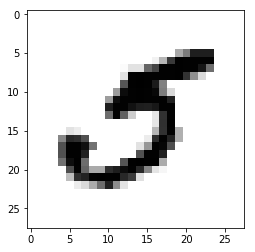

In [62]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.show()

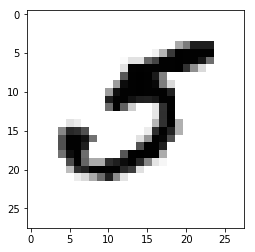

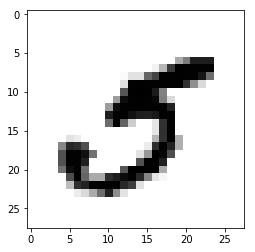

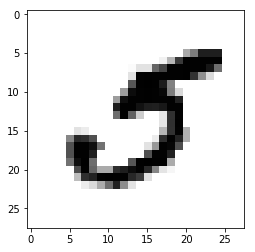

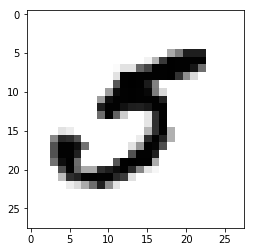

In [71]:
"""plt.imshow(shifted_image_up, cmap = matplotlib.cm.binary, interpolation="nearest")
#plt.axis("off")
plt.show()

plt.imshow(shifted_image_down, cmap = matplotlib.cm.binary, interpolation="nearest")
#plt.axis("off")
plt.show()

plt.imshow(shifted_image_right, cmap = matplotlib.cm.binary, interpolation="nearest")
#plt.axis("off")
plt.show()

plt.imshow(shifted_image_left, cmap = matplotlib.cm.binary, interpolation="nearest")
#plt.axis("off")
plt.show()"""

# Titanic Dataset


# Columns we don't care about
PassengerId, Name, Ticket, Cabin

# Columns that we need to stratify on
Survived

# Columns that we do care about
Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

# Categorical columns that we care about
Survived, Pclass, Sex, Embarked

# Numerical columns that we care about
Age, SibSp, Parch, Fare

# Additional Thoughts
Break the classes up into newly made columns representing one for if they were in that class

Stratify on survived and died to get an equal distribution on the training and test set

In [293]:
import os
import pandas as pd
import numpy as np

def fetch_data(path, csv_file):
    if not os.path.isdir(path):
        os.makedirs(path)
    csv_path = os.path.join(path, csv_file)
    data = pd.read_csv(csv_path)
    
    return data

TITANIC_PATH = os.path.join("datasets", "Titanic")
CSV_FILE = "TitanicTrainSet.csv"

titanic_data = fetch_data(TITANIC_PATH, CSV_FILE)

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [294]:
def drop_bad_attributes(df, listOfBadAttributes):
    for attribute in listOfBadAttributes:
        df = df.drop(attribute, axis = 1)
    return df

titanic_labels = titanic_data["Survived"]
titanic_data = drop_bad_attributes(titanic_data, ['PassengerId','Name', 'Ticket', 'Cabin', 'Survived'])

In [295]:
titanic_data = pd.get_dummies(titanic_data, drop_first=True)

In [296]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

#class DataFrameSelectorCategorical(BaseEstimator, TransformerMixin):
#    def __init__(self, attribute_names):
#        self.attribute_names = attribute_names
#    def fit(self, X, y=None):
#        return self
#    def transform(self, X):
#        X = X[self.attribute_names].apply(lambda x:pd.factorize(x)[0])
#        return X

In [297]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder

num_attribs = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass']
cat_attribs = ['Sex_male', 'Embarked_Q', 'Embarked_S']

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', Imputer(strategy="median"))
    ])


In [298]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline)
    ])

In [299]:
titanic_prepared = full_pipeline.fit_transform(titanic_data)


In [300]:
print(titanic_prepared)

[[-0.56573646  0.43279337 -0.47367361 ...,  0.          0.          0.        ]
 [ 0.66386103  0.43279337 -0.47367361 ...,  1.          0.          1.        ]
 [-0.25833709 -0.4745452  -0.47367361 ...,  1.          0.          0.        ]
 ..., 
 [-0.1046374   0.43279337  2.00893337 ...,  1.          0.          0.        ]
 [-0.25833709 -0.4745452  -0.47367361 ...,  0.          0.          1.        ]
 [ 0.20276197 -0.4745452  -0.47367361 ...,  0.          1.          1.        ]]


In [311]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(titanic_prepared, titanic_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [312]:
from sklearn.model_selection import GridSearchCV


param_grid = [{'weights': ['uniform', 'distance'], 'n_neighbors': [1,2,4,8,16,32]}]

grid_search = GridSearchCV(knn_clf, param_grid, cv=2, scoring='neg_mean_squared_error')
grid_search.fit(titanic_prepared, titanic_labels)

GridSearchCV(cv=2, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 4, 8, 16, 32]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [313]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'uniform'}

In [314]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [318]:
best_knn_clf = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')


In [319]:
from sklearn.model_selection import cross_val_score
cross_val_score(best_knn_clf, titanic_prepared, titanic_labels, cv=3, scoring="accuracy")

array([ 0.77441077,  0.78787879,  0.77104377])

In [320]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
cross_val_score(sgd_clf, titanic_prepared, titanic_labels, cv=3, scoring="accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 0.68350168,  0.75757576,  0.76430976])

# Spam Not Spam

In [23]:
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import string

ps = PorterStemmer()
spam_dataset = pd.read_csv('datasets/spam/spam.csv', encoding='latin-1')

#Get rid of first column it is useless
spam_dataset = spam_dataset.iloc[:, 0:2]

In [24]:
for i in range(0, len(spam_dataset)):
    full_row = ''
    stemmed = spam_dataset["v2"][i].translate(str.maketrans("","", string.punctuation))
    stemmed = stemmed.lower()
    stemmed = stemmed.split(" ")
    for item in stemmed:
        if(item.isdigit()):
            item = '0'
        item = ps.stem(item)
        full_row += item + " "
    full_row = full_row[:-1]
    spam_dataset["v2"][i] = full_row

spam_dataset['v1'] = pd.get_dummies(spam_dataset['v1'], drop_first=True)

In [25]:
spam_dataset.head()

,v1,v2
0,0,go until jurong point crazi avail onli in bugi...
1,0,ok lar joke wif u oni
2,1,free entri in 0 a wkli comp to win fa cup fina...
3,0,u dun say so earli hor u c alreadi then say
4,0,nah i dont think he goe to usf he live around ...


In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

#Split the data based on a certain attribute in this case it is spam and ham
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(spam_dataset, spam_dataset["v1"]):
    strat_train_set = spam_dataset.loc[train_index]
    strat_test_set = spam_dataset.loc[test_index]

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.naive_bayes import MultinomialNB
#vec = CountVectorizer()
#data = vec.fit_transform(strat_train_set['v2']).toarray()
#print(data)
#pipeline = Pipeline([
#    ('vectorizer',  CountVectorizer()),
#    ('classifier',  MultinomialNB()) ])

In [44]:
mnb = MultinomialNB()
vec = CountVectorizer()
data = vec.fit_transform(strat_train_set['v2']).toarray()

(1115,)

In [45]:
from sklearn.model_selection import cross_val_score
cross_val_score(mnb, X = data, y = strat_train_set['v1'], cv=3, scoring="accuracy")

array([ 0.97242771,  0.96835017,  0.97575758])